# CODING TASK #1: IMPORT LIBRARIES AND DATASETS


In [1]:
!pip install --upgrade seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install --upgrade pandas

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
Kyphosis_df = pd.read_csv("kyphosis.csv")

In [5]:
Kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [6]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [7]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [8]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [10]:
Kyphosis_df['Age'].mean()/12

6.97119341563786

In [11]:
Kyphosis_df['Age'].max()/12

17.166666666666668

In [12]:
Kyphosis_df['Age'].min()/12

0.08333333333333333

# CODING TASK #2: PERFORM DATA VISUALIZATION

In [13]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [15]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [16]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [17]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [18]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


In [19]:
Kyphosis_df.corr()

,Kyphosis,Age,Number,Start
Kyphosis,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


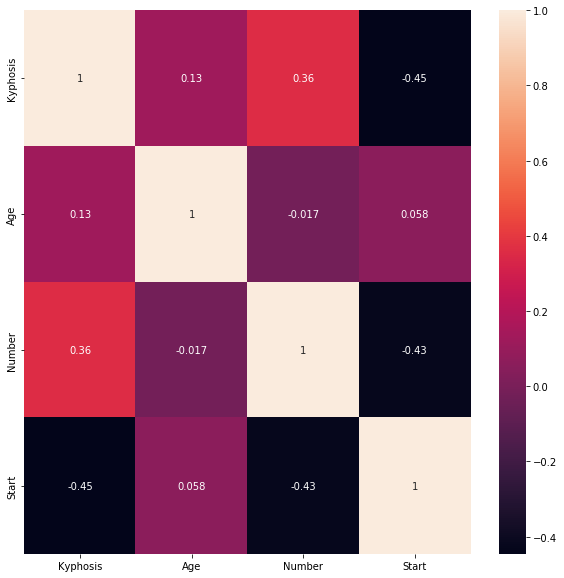

In [20]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True) 

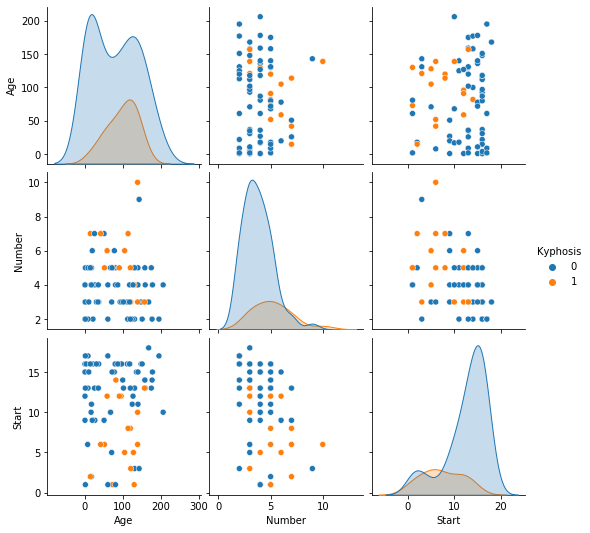

In [21]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start']);

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the data countplot showing how many samples belong to each class**

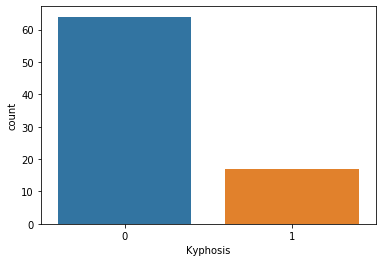

In [22]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = 'Count')

# CODING TASK #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [23]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis=1)
y = Kyphosis_df['Kyphosis']


In [24]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [25]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# CODING TASK #4: TRAIN A KNN MODEL IN SKLEARN

In [28]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [29]:
X_train.shape

(60, 3)

In [30]:
y_train.shape

(60,)

In [31]:
X_test.shape

(21, 3)

In [32]:
y_test.shape

(21,)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# CODING TASK #5: EVALUATE TRAINED KNN MODEL PERFORMANCE IN SKLEARN

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

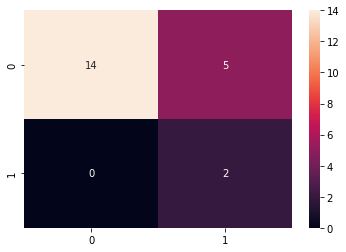

In [38]:
# Predicting the Test set results
y_predict_test = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.29      1.00      0.44         2

    accuracy                           0.76        21
   macro avg       0.64      0.87      0.65        21
weighted avg       0.93      0.76      0.81        21



# CODING TASK #6: TRAIN A KNN MODEL IN SAGEMAKER

In [40]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis = 1)
y = Kyphosis_df['Kyphosis']

In [41]:
X = np.array(X)
y = np.array(y)

In [42]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [43]:
X_train.shape

(56, 3)

In [44]:
X_test.shape

(25, 3)

In [45]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [46]:
train_data

,Target,0,1,2
0,0,168,3,18
1,0,51,7,9
2,0,4,3,16
3,0,72,5,15
4,0,2,3,13
5,0,112,3,16
6,1,59,6,12
7,0,37,3,16
8,1,73,5,1
9,0,131,2,3


In [47]:
train_data.shape

(56, 4)

In [48]:
# save train_data and validation_data as csv files.
train_data.to_csv('train.csv', header = False, index = False)


In [49]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = sagemaker_session.default_bucket()                    # Set a default S3 bucket
prefix = 'KNN-classifier'
key = 'KNN-classifier'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [50]:
print(role)

arn:aws:iam::536425956452:role/service-role/AmazonSageMaker-ExecutionRole-20220503T214133


In [51]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-536425956452/KNN-classifier/train/KNN-classifier


In [52]:
# create output placeholder in S3 bucket to store the output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-1-536425956452/KNN-classifier/output


In [53]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session



# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

# container = sagemaker.image_uris.retrieve("xgboost", region = 'us-east-1')
container = sagemaker.image_uris.retrieve("knn", boto3.Session().region_name)

# container = get_image_uri(boto3.Session().region_name, 'knn','1.0-1') # Latest version of XGboost

In [54]:
X_train

array([[168,   3,  18],
       [ 51,   7,   9],
       [  4,   3,  16],
       [ 72,   5,  15],
       [  2,   3,  13],
       [112,   3,  16],
       [ 59,   6,  12],
       [ 37,   3,  16],
       [ 73,   5,   1],
       [131,   2,   3],
       [  9,   5,  13],
       [ 18,   5,   2],
       [159,   4,  13],
       [  1,   2,  16],
       [105,   6,   5],
       [113,   2,  16],
       [  1,   3,   9],
       [  1,   4,  15],
       [178,   4,  15],
       [ 15,   7,   2],
       [139,   3,  10],
       [121,   3,   3],
       [ 61,   2,  17],
       [ 78,   6,  15],
       [120,   5,   8],
       [  1,   4,  12],
       [ 15,   5,  16],
       [102,   3,  13],
       [118,   4,  16],
       [ 52,   5,   6],
       [ 36,   4,  13],
       [130,   5,  13],
       [195,   2,  17],
       [  8,   3,   6],
       [ 82,   5,  14],
       [ 93,   3,  16],
       [140,   4,  15],
       [139,  10,   6],
       [ 22,   2,  16],
       [148,   3,  16],
       [  2,   2,  17],
       [ 87,   4

In [55]:
X_test

array([[158,   3,  14],
       [136,   4,  15],
       [ 35,   3,  13],
       [  9,   2,  17],
       [ 27,   4,   9],
       [143,   9,   3],
       [ 17,   4,  10],
       [ 68,   5,  10],
       [ 26,   7,  13],
       [ 81,   4,   1],
       [120,   2,  13],
       [ 31,   3,  16],
       [ 20,   6,   9],
       [158,   5,  14],
       [157,   3,  13],
       [ 91,   5,  12],
       [114,   7,   8],
       [ 11,   3,  15],
       [ 71,   3,   5],
       [177,   2,  14],
       [125,   2,  11],
       [128,   4,   5],
       [118,   3,  16],
       [206,   4,  10],
       [ 61,   4,   1]])

In [56]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.



knn_classifier = sagemaker.estimator.Estimator(container,
                                               role, 
                                               instance_count = 1, 
                                               instance_type = 'ml.m4.xlarge',
                                               output_path = output_location,
                                               sagemaker_session = sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 

hyperparams = {"k": 5, "predictor_type": "classifier", "sample_size":64}

knn_classifier.set_hyperparameters(**hyperparams)



In [57]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'text/csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input}

knn_classifier.fit(data_channels)

2022-05-12 04:32:21 Starting - Starting the training job...ProfilerReport-1652329941: InProgress
...
2022-05-12 04:33:05 Starting - Preparing the instances for training............
2022-05-12 04:35:06 Downloading - Downloading input data...
2022-05-12 04:35:50 Training - Downloading the training image............
2022-05-12 04:37:46 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/12/2022 04:37:45 INFO 140343006041920] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'_kvstore': 'dist_async', '_log_level': 'info', '_num_gpus': 'auto', '_num_kv_servers': '1', '_tuning_objective_metric': '', '_faiss_index_nprobe': '5', 'epochs': '1', 'feature_dim': 'auto', 'faiss_index_ivf_nlists': 'auto', 'index_metric': 'L2', 'index_type': 'faiss.Flat', 'mini_batch_size': '5000', '_enable_profiler': 'false'}
[05/12/2022

# CODING TASK #7: DEPLOY MODEL TO PERFORM INFERENCE

In [58]:
# Deploy the model to perform inference 
# For CSV training, the algorithm assumes that the target variable is in the first column and that the CSV does not have a header record.
# For CSV inference, the algorithm assumes that CSV input does not have the label column.

knn_predictor = knn_classifier.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')



-------------!

In [59]:
from sagemaker.predictor import csv_serializer, json_deserializer
knn_predictor.serializer = csv_serializer
knn_predictor.deserializer = json_deserializer

In [60]:
X_test

array([[158,   3,  14],
       [136,   4,  15],
       [ 35,   3,  13],
       [  9,   2,  17],
       [ 27,   4,   9],
       [143,   9,   3],
       [ 17,   4,  10],
       [ 68,   5,  10],
       [ 26,   7,  13],
       [ 81,   4,   1],
       [120,   2,  13],
       [ 31,   3,  16],
       [ 20,   6,   9],
       [158,   5,  14],
       [157,   3,  13],
       [ 91,   5,  12],
       [114,   7,   8],
       [ 11,   3,  15],
       [ 71,   3,   5],
       [177,   2,  14],
       [125,   2,  11],
       [128,   4,   5],
       [118,   3,  16],
       [206,   4,  10],
       [ 61,   4,   1]])

In [61]:
result = knn_predictor.predict(X_test)


The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [62]:
result

{'predictions': [{'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 1.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 0.0},
  {'predicted_label': 1.0}]}

In [63]:
y_predict = np.array([result['predictions'][i]['predicted_label'] for i in range(len(result['predictions']))])

In [64]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1.])

In [65]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

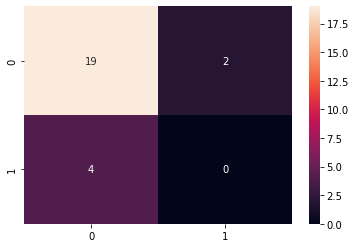

In [66]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')

In [67]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))

Precision = 0.41304347826086957
Recall = 0.4523809523809524
Accuracy = 0.76


In [69]:
# Delete the end-point
knn_predictor.delete_endpoint()

# EXCELLENT JOB!

# FINAL CAPSTONE PROJECT QUESTIONS

Using the same dataset, perform the following tasks:
- Train a random forest classifier model in SKLearn and assess its performance
- Plot the confusion matrix
- Print the classification Report
- Train a decision tree classifier model in SKLearn and assess its performance
- Plot the confusion matrix
- Print the classification Report
- Calculate Feature Importance
- Train an XG-Boost Algorithm in SageMaker
- Comment on the results


# FINAL CAPSTONE PROJECT SOLUTION

In [70]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

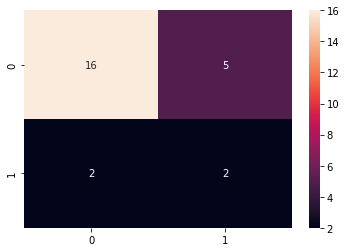

In [71]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [72]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.29      0.50      0.36         4

    accuracy                           0.72        25
   macro avg       0.59      0.63      0.59        25
weighted avg       0.79      0.72      0.75        25



In [73]:
labels = ['Age', 'Number', 'Start']

In [74]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = labels,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.424991
Age       0.372841
Number    0.202167


              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.43      0.75      0.55         4

    accuracy                           0.80        25
   macro avg       0.69      0.78      0.71        25
weighted avg       0.86      0.80      0.82        25



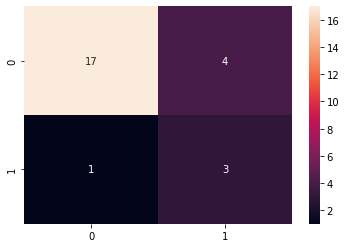

In [75]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

In [76]:
from sagemaker.amazon.amazon_estimator import get_image_uri

# container = sagemaker.image_uris.retrieve("xgboost", region = 'us-east-1')
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

# container = get_image_uri(boto3.Session().region_name, 'xgboost','1.0-1') # Latest version of XGboost

In [77]:
Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                                   role, 
                                                   instance_count = 1, 
                                                   instance_type = 'ml.m4.xlarge',
                                                   output_path = output_location,
                                                   sagemaker_session = sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 
Xgboost_classifier.set_hyperparameters(max_depth = 20,
                                       objective = 'multi:softmax',
                                       num_class = 2,
                                       eta = 0.1,
                                       num_round = 150)


In [78]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input}

Xgboost_classifier.fit(data_channels)

2022-05-12 05:10:28 Starting - Starting the training job...
2022-05-12 05:10:55 Starting - Preparing the instances for trainingProfilerReport-1652332228: InProgress
............
2022-05-12 05:12:56 Downloading - Downloading input data......
2022-05-12 05:13:52 Training - Downloading the training image...
2022-05-12 05:14:27 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[05:14:32] 56x3 matrix with 168 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:Single node tra

In [79]:
# Deploy the model to perform inference 
# For CSV training, the algorithm assumes that the target variable is in the first column and that the CSV does not have a header record.
# For CSV inference, the algorithm assumes that CSV input does not have the label column.

xgb_predictor = Xgboost_classifier.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')



------!

In [80]:
from sagemaker.predictor import csv_serializer, json_deserializer
xgb_predictor.serializer = csv_serializer
# xgb_predictor.deserializer = json_deserializer

In [81]:
X_test

array([[158,   3,  14],
       [136,   4,  15],
       [ 35,   3,  13],
       [  9,   2,  17],
       [ 27,   4,   9],
       [143,   9,   3],
       [ 17,   4,  10],
       [ 68,   5,  10],
       [ 26,   7,  13],
       [ 81,   4,   1],
       [120,   2,  13],
       [ 31,   3,  16],
       [ 20,   6,   9],
       [158,   5,  14],
       [157,   3,  13],
       [ 91,   5,  12],
       [114,   7,   8],
       [ 11,   3,  15],
       [ 71,   3,   5],
       [177,   2,  14],
       [125,   2,  11],
       [128,   4,   5],
       [118,   3,  16],
       [206,   4,  10],
       [ 61,   4,   1]])

In [82]:
result = xgb_predictor.predict(X_test)


The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [83]:
result

b'0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0'

In [86]:
y_predict = bytes_2_array(result)

In [87]:
y_predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [85]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    #Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    #iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    #converting the list to into array
    l = np.array(l).astype('float32')
    
    #reshape one-dimensional array to two-dimentaional array
    return l.reshape(-1,1)

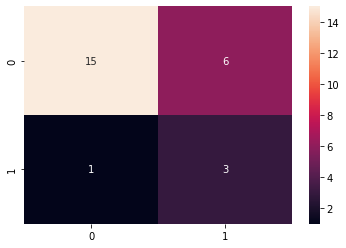

In [88]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')

In [89]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))

Precision = 0.6354166666666666
Recall = 0.7321428571428572
Accuracy = 0.72


In [90]:
# Delete the end-point
xgb_predictor.delete_endpoint()

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [ ]:
Kyphosis_df.describe()

In [ ]:
Kyphosis_df['Age'].mean()/12

In [ ]:
Kyphosis_df['Age'].min()/12

In [ ]:
Kyphosis_df['Age'].max()/12

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the data countplot showing how many samples belong to each class**

In [ ]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = "Count");